# For Misleading Image

refuting
refuting
refuting
refuting
refuting
refuting
refuting
refuting
refuting
refuting
irrelevant
irrelevant
refuting
refuting
refuting
refuting
supporting
supporting
irrelevant
irrelevant
supporting
supporting
refuting
refuting
irrelevant
irrelevant
refuting
refuting
refuting
refuting
refuting
refuting
irrelevant
irrelevant
irrelevant
irrelevant
refuting
refuting
refuting
refuting
supporting
supporting
refuting
refuting
irrelevant
irrelevant
irrelevant
irrelevant
irrelevant
irrelevant
irrelevant
irrelevant
refuting
refuting
refuting
refuting
irrelevant
irrelevant
supporting
supporting
refuting
refuting
supporting
supporting
irrelevant
irrelevant
supporting
supporting
supporting
supporting
supporting
supporting
refuting
refuting
irrelevant
irrelevant
irrelevant
irrelevant
irrelevant
irrelevant
refuting
refuting
irrelevant
irrelevant
refuting
refuting
refuting
refuting
irrelevant
irrelevant
irrelevant
irrelevant
refuting
refuting
refuting
refuting
irrelevant
irrelevant
refuting
refut

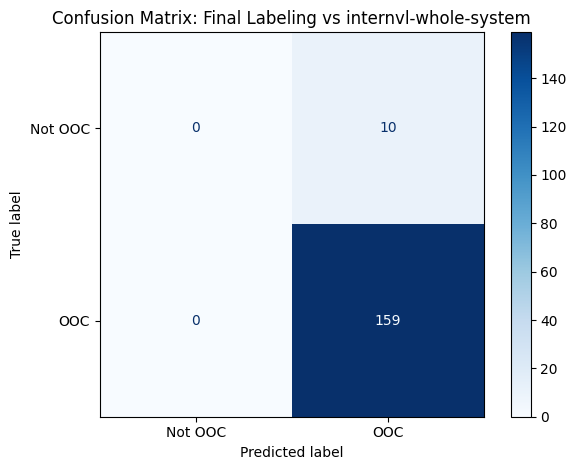

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import re
import math
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

JSON_PATH = "baselines_for_part_a_dataset.json" 

# --- load ---
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

# --- normalize to a shared binary schema: 0 = Not OOC, 1 = OOC ---
def to01(x):
    s = str(x).strip().lower().replace("'",'').replace('[','').replace(']','')
    print(s)
    print(s)
    if s.startswith("benign") or s in {"supporting"}:
            return 0
    if s in {"misleading", "refuting", "irrelevant"}:
            return 1
    return np.nan  # unknown -> drop
def to01_2(x):
    pattern = re.compile(r'(?is)^\s*answer\s*:\s*(.*?)(?:\n\s*\n|$)', re.MULTILINE)
    matches = list(pattern.finditer(x))
    extracted_answer = matches[-1].group(1).strip() if matches else None
    if extracted_answer:
            #extracted_answer = match.group(1).strip()
            print("Extracted Answer:", extracted_answer)
            s = str(extracted_answer).strip().lower()

            if s.startswith("benign") or s in {"supporting"}:
                    return 0
            if s in {"misleading", "refuting", "irrelevant"}:
                    return 1
    else:
            return np.nan      
        
        

y_true = [to01(d.get("Final Labeling")) for d in data]
y_pred = [to01(d.get("llava_whole_system_prompt_2")) for d in data]

# drop unknowns
def is_missing(x):
    if x is None:
        return True
    # numpy float types
    if isinstance(x, (float, np.floating)):
        return math.isnan(float(x))
    # ints, strings, bools, etc. are not NaN
    return False

def is_valid_number(x):
    return isinstance(x, (int, float)) and not np.isnan(x)

mask = [is_valid_number(a) and is_valid_number(b) for a, b in zip(y_true, y_pred)]
y_true = np.array([a for a, m in zip(y_true, mask) if m], dtype=int)
y_pred = np.array([b for b, m in zip(y_pred, mask) if m], dtype=int)


print(f"Samples kept: {len(y_true)} (dropped {len(mask) - sum(mask)} unmapped)")

# --- metrics ---
labels01 = [0, 1]
names = ["Not OOC", "OOC"]

acc = accuracy_score(y_true, y_pred)
p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=labels01, average="binary", zero_division=0)
print(f"Accuracy: {acc:.3f}  Precision: {p:.3f}  Recall: {r:.3f}  F1: {f1:.3f}\n")
y_true_1 = y_true
y_pred_1 = y_pred
print("Classification report:")
print(classification_report(y_true, y_pred, labels=labels01, target_names=names, digits=3, zero_division=0))

# --- confusion matrix ---
cm = confusion_matrix(y_true, y_pred, labels=labels01)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Final Labeling vs internvl-whole-system")
plt.tight_layout()
plt.show()


asymmetric
symmetric-benign
symmetric-miscaptioned
symmetric-benign
asymmetric
symmetric-miscaptioned
asymmetric
symmetric-miscaptioned
symmetric-benign
asymmetric
symmetric-benign
asymmetric
symmetric-benign
symmetric-benign
symmetric-benign
symmetric-benign
symmetric-benign
symmetric-miscaptioned
asymmetric
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-benign
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-benign
symmetric-miscaptioned
asymmetric
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-benign
symmetric-miscaptioned
asymmetric
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-miscaptioned
symmetric-benign
symmetric-miscaptioned
asymmetric
symmetric-miscaptioned
symmetric-mis

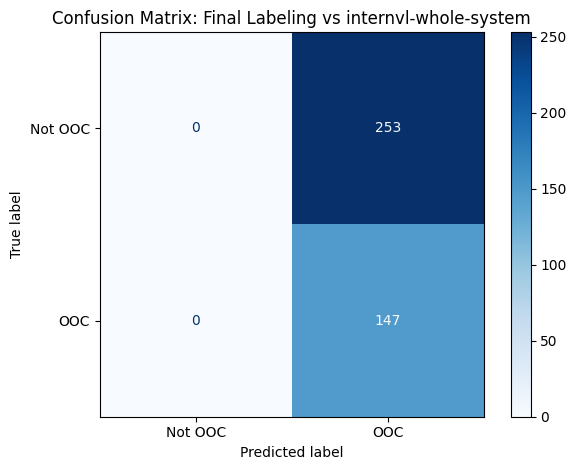

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import re
JSON_PATH = "baselines_for_part_b_dataset_2.json" 

# --- load ---
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)
def is_misleading_image(x) -> bool:
    return str(x).strip().lower() == "misleading image"

before = len(data)
data = [d for d in data if not is_misleading_image(d.get("Final Labeling"))]
# --- normalize to a shared binary schema: 0 = Not OOC, 1 = OOC ---
import numpy as np

def split_and_clean(text):
    if not text or not isinstance(text, str):
        return "", ""
    
    # Split into lines and strip whitespace
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    
    classification = ""
    reasoning = ""

    if lines:
        first_line = re.sub(r"^\d+\.\s*", "", lines[0])
        first_line = re.sub(r"\*\*(.*?)\*\*", r"\1", first_line)
        classification = first_line.strip()
        reasoning = "\n".join(lines[1:]).strip()
        reasoning = re.sub(r"^\d+\.\s*", "", reasoning)

    return classification, reasoning

def to01(x):
    if not isinstance(x, str):
        return np.nan
    
    classification, _ = split_and_clean(x)
    classification =classification.replace("label: ", "").strip("[]().'*").lower().replace("'",'').replace('[','').replace(']','')
    print(classification)
    if classification in {
        "evidence-based miscaptioning", "narrative-based miscaptioning",
        "symmetric-miscaptioned", "misleading", "**misleading**",
        "label: narrative-based miscaptioning", "label: evidence-based miscaptioning"

    }:
        return 1
    elif classification in {
        "none of them", "asymmetric", "symmetric-benign",
        "benign", "**benign**", "label:asymmetric", "label: symmetric-benign", "label: none of them", "none of them"
    }:
        return 0

    return np.nan  # unknown or unmapped
def to01_2(x):
        extracted_answer = ''
        match = re.search(r'Answer:\s*(.*?)(\n\n|$)', x, re.DOTALL)
        if match:
            extracted_answer = match.group(1).strip()
            print("Extracted Answer:", extracted_answer)
            s = str(extracted_answer).strip().lower()
            if s in {
                "evidence-based miscaptioning", "narrative-based miscaptioning",
                "symmetric-miscaptioned", "misleading", "**misleading**",
                "label: narrative-based miscaptioning", "label: evidence-based miscaptioning"

            }:
                return 1
            elif s in {
                "none of them", "asymmetric", "symmetric-benign",
                "benign", "**benign**", "label:asymmetric", "label: symmetric-benign", "label: none of them", "none of them"
            }:
                return 0
            return 0      
y_true = [to01(d.get("Final Labeling")) for d in data]
y_pred = [to01(str(d.get("llava_whole_system_prompt_2"))) for d in data]

# drop unknowns
def is_valid_number(x):
    return isinstance(x, (int, float)) and not np.isnan(x)

mask = [is_valid_number(a) and is_valid_number(b) for a, b in zip(y_true, y_pred)]
y_true = np.array([a for a, m in zip(y_true, mask) if m], dtype=int)
y_pred = np.array([b for b, m in zip(y_pred, mask) if m], dtype=int)
unmapped_items = [data[i] for i, m in enumerate(mask) if not m]
print(len(unmapped_items), unmapped_items[:3])  # show a few
print(f"Samples kept: {len(y_true)} (dropped {len(mask) - sum(mask)} unmapped)")

# --- metrics ---
labels01 = [0, 1]
names = ["Not OOC", "OOC"]

acc = accuracy_score(y_true, y_pred)
p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=labels01, average="binary", zero_division=0)
print(f"Accuracy: {acc:.3f}  Precision: {p:.3f}  Recall: {r:.3f}  F1: {f1:.3f}\n")
y_true_2 = y_true
y_pred_2 = y_pred
print("Classification report:")
print(classification_report(y_true, y_pred, labels=labels01, target_names=names, digits=3, zero_division=0))

# --- confusion matrix ---
cm = confusion_matrix(y_true, y_pred, labels=labels01)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Final Labeling vs internvl-whole-system")
plt.tight_layout()
plt.show()

# Merge Tweets

Accuracy: 0.5377855887521968
              precision    recall  f1-score   support

     Not OOC      0.000     0.000     0.000       263
         OOC      0.538     1.000     0.699       306

    accuracy                          0.538       569
   macro avg      0.269     0.500     0.350       569
weighted avg      0.289     0.538     0.376       569

Accuracy: 0.538  Precision: 0.538  Recall: 1.000  F1: 0.699



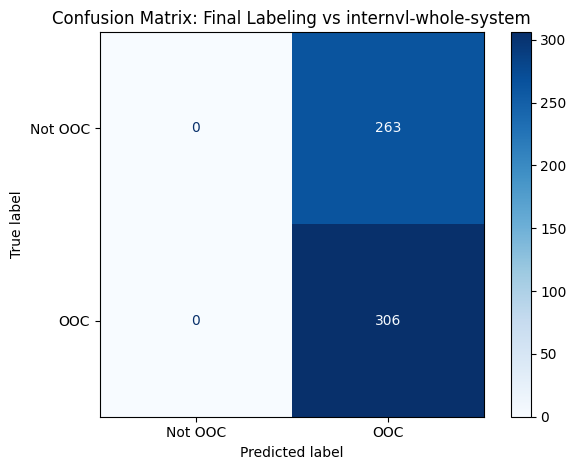

In [5]:
y_true = np.concatenate([y_true_1, y_true_2])
y_pred = np.concatenate([y_pred_1, y_pred_2])

print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=["Not OOC","OOC"], digits=3, zero_division=0))
acc = accuracy_score(y_true, y_pred)
p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=labels01, average="binary", zero_division=0)
print(f"Accuracy: {acc:.3f}  Precision: {p:.3f}  Recall: {r:.3f}  F1: {f1:.3f}\n")

cm = confusion_matrix(y_true, y_pred, labels=labels01)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Final Labeling vs internvl-whole-system")
plt.tight_layout()
plt.show()